**Importing necessary files**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading dataset**

In [4]:
matches = pd.read_csv('matches.csv')

**Displaying columns and other informations**

In [5]:
matches.columns

Index(['Match_number', 'Team_1', 'Team_2', 'Date_of_match', 'Venue_stadium',
       'Venue_city', 'Toss_winner', 'Toss_decision', 'Match_result',
       'Winning_team', 'Man_of_match', 'Win_by_runs', 'Win_by_wickets',
       'Match_type', 'Super_over_match'],
      dtype='object')

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match_number      55 non-null     int64  
 1   Team_1            55 non-null     object 
 2   Team_2            55 non-null     object 
 3   Date_of_match     55 non-null     object 
 4   Venue_stadium     55 non-null     object 
 5   Venue_city        55 non-null     object 
 6   Toss_winner       52 non-null     object 
 7   Toss_decision     52 non-null     object 
 8   Match_result      55 non-null     object 
 9   Winning_team      51 non-null     object 
 10  Man_of_match      51 non-null     object 
 11  Win_by_runs       27 non-null     float64
 12  Win_by_wickets    24 non-null     float64
 13  Match_type        55 non-null     object 
 14  Super_over_match  55 non-null     object 
dtypes: float64(2), int64(1), object(12)
memory usage: 6.6+ KB


# Data Wrangling

In [8]:
matches.isnull().sum()

Match_number         0
Team_1               0
Team_2               0
Date_of_match        0
Venue_stadium        0
Venue_city           0
Toss_winner          3
Toss_decision        3
Match_result         0
Winning_team         4
Man_of_match         4
Win_by_runs         28
Win_by_wickets      31
Match_type           0
Super_over_match     0
dtype: int64

**Now changing float values to int for better understanding and remove unwanted errors**

In [28]:
label1=('Win_by_runs')
matches[label1]=matches[label1].astype(int)

In [29]:
label2=('Win_by_wickets')
matches[label2]=matches[label2].astype(int)

**Removing NaN valuee**

In [32]:
matches.fillna(0, inplace = True)
matches['Match_Result'] = matches['Winning_team'].apply(lambda x: '0.5' if x == 0 else 1)
matches['Winning_team'] = matches['Winning_team'].apply(lambda x: 'TIE' if x == 0 else x)

**Handling duplicates**

In [33]:
matches.drop_duplicates()

,Match_number,Team_1,Team_2,Date_of_match,Venue_stadium,Venue_city,Toss_winner,Toss_decision,Match_result,Winning_team,Man_of_match,Win_by_runs,Win_by_wickets,Match_type,Super_over_match,Match_Result
0,1,Canada,USA,02-06-2024,Grand Prairie Stadium,Dallas,USA,bowl,Played,USA,Aaron Jones,0,7,Group Stage,No,1
1,2,Papua New Guinea,West Indies,02-06-2024,Providence Stadium,Providence,West Indies,bowl,Played,West Indies,RL Chase,0,5,Group Stage,No,1
2,3,Oman,Namibia,03-06-2024,Kensington Oval,Bridgetown,Namibia,bowl,Played,Namibia,D Wiese,11,0,Group Stage,Yes,1
3,4,Sri Lanka,South Africa,03-06-2024,Nassau County International Cricket Stadium,New York,Sri Lanka,bowl,Played,South Africa,A Nortje,0,6,Group Stage,No,1
4,5,Afghanistan,Uganda,04-06-2024,Providence Stadium,Providence,Uganda,bowl,Played,Afghanistan,Fazalhaq Farooqi,125,0,Group Stage,No,1
5,6,Scotland,England,05-06-2024,Kensington Oval,Bridgetown,Scotland,bat,Abandoned,TIE,0,0,0,Group Stage,No,1
6,7,Nepal,Netherlands,05-06-2024,Grand Prairie Stadium,Dallas,Netherlands,bowl,Played,Netherlands,TJG Pringle,0,6,Group Stage,No,1
7,8,Ireland,India,05-06-2024,Nassau County International Cricket Stadium,New York,India,bowl,Played,India,JJ Bumrah,0,8,Group Stage,No,1
8,9,Papua New Guinea,Uganda,06-06-2024,Providence Stadium,Providence,Uganda,bowl,Played,Uganda,Riazat Ali Shah,0,3,Group Stage,No,1
9,10,Australia,Oman,06-06-2024,Kensington Oval,Bridgetown,Oman,bowl,Played,Australia,MP Stoinis,39,0,Group Stage,No,1


In [13]:
matches.duplicated().sum()

0

**Analyzing matches won by runs versus those won by wickets**

In [12]:
statistics = matches[['Win_by_runs', 'Win_by_wickets']].describe()
print(statistics)

       Win_by_runs  Win_by_wickets
count    55.000000       55.000000
mean     18.581818        2.800000
std      32.502815        3.529768
min       0.000000        0.000000
25%       0.000000        0.000000
50%       0.000000        0.000000
75%      22.500000        6.500000
max     134.000000       10.000000


**Comparing the number of matches where the toss-winning team chose to bat versus those where they chose to bowl**

In [34]:
bat_decision_counts = matches['Toss_decision'].value_counts().get('bat', 0)
print("Number of teams choosing batting after winning a toss ",bat_decision_counts)
ball_decision_counts = matches['Toss_decision'].value_counts().get('bowl', 0)
print("Number of teams choosing bowling after winning a toss ",ball_decision_counts)

Number of teams choosing batting after winning a toss  9
Number of teams choosing bowling after winning a toss  43


**Analyzing the impact of toss decisions on match outcomes**

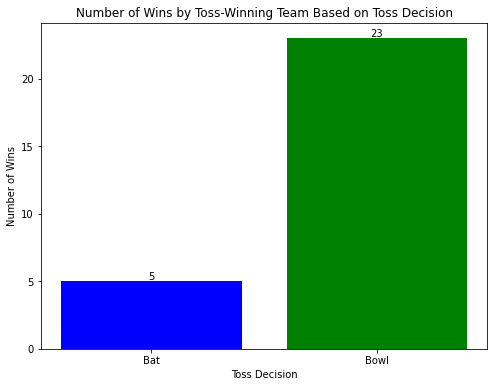

In [14]:
batWins = matches[(matches['Toss_decision'] == 'bat') & (matches['Winning_team'] == matches['Toss_winner'])].shape[0]
ballWins = matches[(matches['Toss_decision'] == 'bowl') & (matches['Winning_team'] == matches['Toss_winner'])].shape[0]

decisions = ['Bat', 'Bowl']
win_counts = [batWins, ballWins]

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(decisions, win_counts, color=['blue', 'green'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')
    
plt.xlabel('Toss Decision')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Toss-Winning Team Based on Toss Decision')
plt.show()

**Number of matches played by different team in T20**

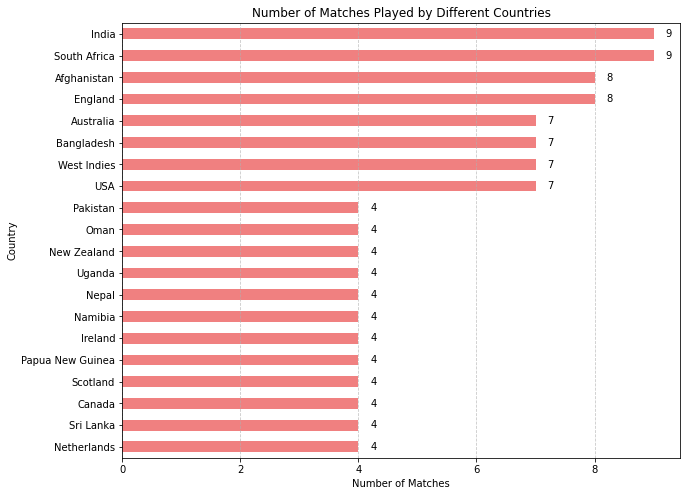

In [15]:
team_1_counts = matches['Team_1'].value_counts()
team_2_counts = matches['Team_2'].value_counts()

# Combine the counts to get the total matches each team played
total_counts = team_1_counts.add(team_2_counts, fill_value=0).sort_values(ascending=True)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))
bars = total_counts.plot(kind='barh', color='lightcoral')

# Add text labels to the bars
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height() / 2.0, '%d' % int(width),
             ha='left', va='center')
    
plt.xlabel('Number of Matches')
plt.ylabel('Country')
plt.title('Number of Matches Played by Different Countries')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Number of matches on Different Dates**

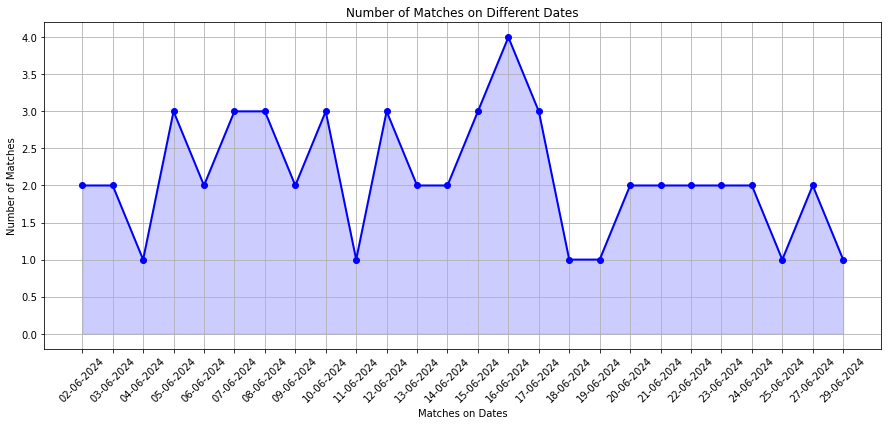

In [16]:
# Count the number of matches on each date and sort by date
date_counts = matches['Date_of_match'].value_counts().sort_index()

# Plotting the line graph
plt.figure(figsize=(15, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.fill_between(date_counts.index, date_counts.values, color='b', alpha=0.2)

# Adding labels and title
plt.xlabel('Matches on Dates')
plt.ylabel('Number of Matches')
plt.title('Number of Matches on Different Dates')

# Display the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Analysing and Calculating winning percentage of each team in T20 world cup 2024**

In [35]:
matches_no_tie = matches[matches['Winning_team'] != 'Tie']

total_matches_played = matches_no_tie['Team_1'].value_counts() + matches_no_tie['Team_2'].value_counts()
total_matches_won = matches_no_tie['Winning_team'].value_counts()
total_matches_winning_percent = (total_matches_won / total_matches_played * 100).fillna(0)
total_matches_winning_percent = total_matches_winning_percent.astype(int).sort_values(ascending = False).head(10)

print("Winning Percent of each team : ",total_matches_winning_percent)

India           88
South Africa    88
West Indies     71
Australia       71
Afghanistan     62
England         50
Pakistan        50
Scotland        50
Bangladesh      42
USA             28
dtype: int32


**Analyzing the distribution of matches played across various stadiums**

In [20]:
matches.Venue_stadium.value_counts()

Kensington Oval                                      9
Sir Vivian Richards Stadium                          8
Nassau County International Cricket Stadium          8
Daren Sammy National Cricket Stadium                 6
Providence Stadium                                   6
Arnos Vale Ground                                    5
Brian Lara Stadium                                   5
Central Broward Regional Park Stadium Turf Ground    4
Grand Prairie Stadium                                4
Name: Venue_stadium, dtype: int64

**Analyzing the Man of the Match awards for each match across different teams**

In [36]:
all_teams = pd.concat([matches['Team_1'], matches['Team_2']]).unique()

# Create a new DataFrame with the unique teams
teams_df = pd.DataFrame({
    'Teams': all_teams
})

In [37]:
team_man_of_match = {}

# Iterate through each team and get the Man of the Match frequencies
for team in all_teams:
    man_of_match_team_1 = matches[matches['Team_1'] == team]['Man_of_match'].value_counts()
    man_of_match_team_2 = matches[matches['Team_2'] == team]['Man_of_match'].value_counts()
    man_of_match_combined = man_of_match_team_1.add(man_of_match_team_2, fill_value=0)
    team_man_of_match[team] = man_of_match_combined

# Create DataFrame for output
max_man_of_match = max(len(v) for v in team_man_of_match.values())

# Initialize DataFrame
df = pd.DataFrame(index=range(max_man_of_match))

# Populate the DataFrame
for team, man_of_match_freq in team_man_of_match.items():
    # Fill the DataFrame with Man of the Match and frequencies
    df[team] = [f"{man} ({int(freq)})" for man, freq in man_of_match_freq.items()] + [""] * (max_man_of_match - len(man_of_match_freq))

# Display the DataFrame
df = df.fillna('')

In [38]:
from IPython.display import display

# Display
display(df)

,Canada,Papua New Guinea,Oman,Sri Lanka,Afghanistan,Scotland,Nepal,Ireland,Australia,Pakistan,Namibia,Netherlands,West Indies,India,South Africa,USA,Bangladesh,Uganda,England,New Zealand
0,0 (1),RL Chase (1),AU Rashid (1),0 (1),Fazalhaq Farooqi (2),0 (1),0 (1),0 (1),A Zampa (2),JJ Bumrah (1),A Zampa (1),DA Miller (1),AJ Hosein (1),0 (1),A Nortje (1),0 (1),H Klaasen (1),AJ Hosein (1),0 (1),Rahmanullah Gurbaz (1)
1,Aaron Jones (1),LH Ferguson (1),BJ McMullen (1),Rishad Hossain (1),Gulbadin Naib (1),BJ McMullen (1),T Shamsi (1),JJ Bumrah (1),Gulbadin Naib (1),MD Patel (1),D Wiese (1),KIC Asalanka (1),N Pooran (1),AR Patel (1),DA Miller (1),AU Rashid (1),HH Pandya (1),Fazalhaq Farooqi (1),A Zampa (1),TG Southee (1)
2,Mohammad Amir (1),Riazat Ali Shah (1),D Wiese (1),A Nortje (1),M Jansen (1),MA Leask (1),TJG Pringle (1),NR Kirton (1),MP Stoinis (2),Mohammad Amir (1),HC Brook (1),Shakib Al Hasan (1),PD Salt (1),Arshdeep Singh (1),H Klaasen (1),Aaron Jones (1),Naveen-ul-Haq (1),Riazat Ali Shah (1),AR Patel (1),LH Ferguson (1)
3,NR Kirton (1),Fazalhaq Farooqi (1),MP Stoinis (1),KIC Asalanka (1),N Pooran (1),MP Stoinis (1),Tanzim Hasan Sakib (1),Shaheen Shah Afridi (1),PJ Cummins (1),Shaheen Shah Afridi (1),MA Leask (1),TJG Pringle (1),RL Chase (2),HH Pandya (1),M Jansen (1),Arshdeep Singh (1),PJ Cummins (1),TG Southee (1),AU Rashid (2),SE Rutherford (1)
4,,,,,Naveen-ul-Haq (1),,,,RG Sharma (1),,,,SE Rutherford (1),JJ Bumrah (2),Q de Kock (2),MD Patel (1),Rishad Hossain (1),,HC Brook (1),
5,,,,,Rahmanullah Gurbaz (1),,,,,,,,T Shamsi (1),RG Sharma (1),T Shamsi (2),Q de Kock (1),Shakib Al Hasan (1),,PD Salt (1),
6,,,,,SA Yadav (1),,,,,,,,,SA Yadav (1),V Kohli (1),RL Chase (1),Tanzim Hasan Sakib (1),,Q de Kock (1),
7,,,,,,,,,,,,,,V Kohli (1),,,,,,


<AxesSubplot:>

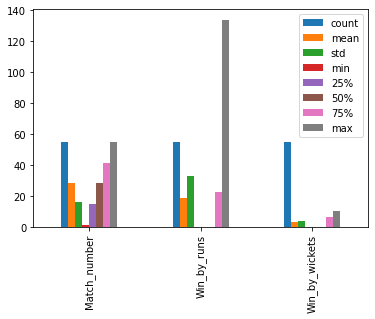

In [26]:
 matches.describe().T.plot(kind='bar')

**The correlation coefficient of -0.462 indicates a moderate negative relationship, suggesting that as wins by runs increase, wins by wickets decrease, and vice versa**

In [39]:
matches['Win_by_runs'].corr(matches['Win_by_wickets'])

-0.46190012213618303

<AxesSubplot:>

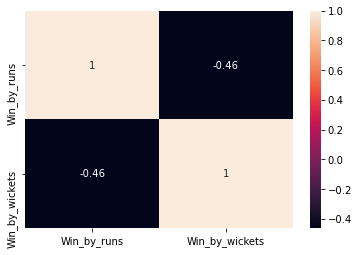

In [41]:
sns.heatmap(matches[['Win_by_runs','Win_by_wickets']].corr(),annot=True)

In [45]:
batting_stats = pd.read_csv("batting_stats.csv")
top_6_batsmen = batting_stats.sort_values(by='Runs', ascending=False).head(6)

print(top_6_batsmen)

   Position             Batsman  Matches  Innings  Runs  Average  Strike_rate  \
0         1  Rahmanullah Gurbaz        8        8   281    35.12       124.34   
1         2        Rohit Sharma        8        8   257    36.71       156.71   
2         3         Travis Head        7        7   255    42.50       158.39   
3         4     Quinton de Kock        9        9   243    27.00       140.46   
4         5      Ibrahim Zadran        8        8   231    28.88       107.44   
5         6     Nicholas Pooran        7        7   228    38.00       146.15   

   Fours  Sixes  
0     18     16  
1     24     15  
2     26     15  
3     21     13  
4     25      4  
5     15     17  
